In [14]:
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
ticker = 'IBM'

df = pdr.get_data_yahoo(ticker)
df['30d avg'] = df['Adj Close'].rolling(window=30).mean()
df['30d std'] = df['Adj Close'].rolling(window=30).std()
df['Upper Band'] = df['30d avg'] + (df['30d std'] * 2)
df['Lower Band'] = df['30d avg'] - (df['30d std'] * 2)

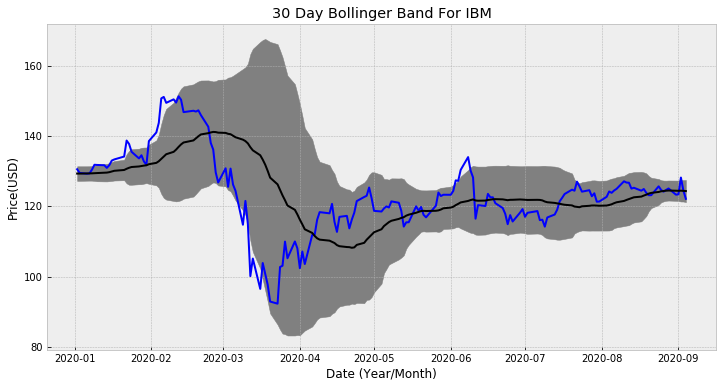

In [24]:
# set style, empty figure and axes
plt.style.use('bmh')
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)

# Get index values for the X axis for the DataFrame
x_axis = df['2020':].index.get_level_values(0)

# Plot shaded 21 Day Bollinger Band for Facebook
ax.fill_between(x_axis, df['2020':]['Upper Band'], df['2020':]['Lower Band'], color='grey')

ax.plot(x_axis, df['2020':]['Adj Close'], color='blue', lw=2)
ax.plot(x_axis, df['2020':]['30d avg'], color='black', lw=2)

# Set Title & Show the Image
ax.set_title('30 Day Bollinger Band For ' + ticker)
ax.set_xlabel('Date (Year/Month)')
ax.set_ylabel('Price(USD)')
plt.show()

In [29]:
def predict():
    curr_price = df.tail()['Adj Close'][0]
    upper_band = df.tail()['Upper Band'][0]
    lower_band = df.tail()['Lower Band'][0]
    if curr_price < lower_band:
        return "BUY"
    elif curr_price > upper_band:
        return "SELL"  
    return "HOLD"


In [30]:
predict()

'HOLD'